### Baseline Models Template for 2016 - 2020 Data

In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA, SparsePCA
from sklearn.covariance import empirical_covariance
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

import seaborn as sns
import joblib
import os
#from adspy_shared_utilities import plot_decision_tree
from datetime import datetime

In [37]:
rng = 42

In [4]:
p = '../data/'
input_name = 'cleaned.csv'

df = pd.read_csv(f'{p}{input_name}')

#### Preprocessing

In [31]:
def df_filtering(df, i_e = 'I', f_cols = []):

    filtered_df = df[df.i_e == i_e]
    filtered_df = filtered_df[f_cols+['act']]
    
    return filtered_df

In [6]:
df.columns

Index(['control_number', 'species_code', 'genus', 'species', 'wildlf_desc',
       'wildlf_cat', 'cartons', 'qty', 'unit', 'value', 'ctry_org', 'ctry_ie',
       'purp', 'src', 'trans_mode', 'act', 'dp_cd', 'disp_date', 'ship_date',
       'i_e', 'pt_cd', 'specific_generic_name', 'disp_date_yyyy',
       'disp_date_mm', 'ship_date_yyyy', 'ship_date_mm', 'disp_ship_date'],
      dtype='object')

In [21]:
non_feature_cols = ['control_number', 'disp_date', 'i_e', 'ship_date', 
                    'cartons', 'qty', 'unit', 'specific_generic_name',
                    'genus', 'species', 'wildlf_cat', 
                    'disp_date_yyyy', 'disp_date_mm', 'disp_ship_date']

target = ['act', 'dp_cd']

feature_cols = ['species_code', 'wildlf_desc', 
                'ctry_org', 'ctry_ie','purp', 'src', 'trans_mode', 'pt_cd', 
                 'value', 'ship_date_mm']

In [35]:
import_df = df_filtering(df, i_e = 'I', f_cols = feature_cols)
export_df = df_filtering(df, i_e = 'E', f_cols = feature_cols)
# import: 590505 rows × 11 columns
# export: 299340 rows × 11 columns

In [235]:
def data_split(df):
    X, y = df.iloc[:,:-1], df.iloc[:,-1:]
    # X = pd.get_dummies(X, sparse=True)
    # y = np.where(y['act']=='R',1,0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng, stratify=y) 
    
    return X_train, X_test, y_train, y_test
    

In [236]:
X_train, X_test, y_train, y_test = data_transformation(export_df)

In [ ]:
# set up folder to save results
os.makedirs('export_run3')
prefix = 'export_run3/export'

### column transformer w/ OneHotEncoding

In [ ]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299340 entries, 11 to 1890123
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   species_code  299340 non-null  object 
 1   wildlf_desc   299340 non-null  object 
 2   ctry_org      299340 non-null  object 
 3   ctry_ie       299340 non-null  object 
 4   purp          299340 non-null  object 
 5   src           299340 non-null  object 
 6   trans_mode    299340 non-null  object 
 7   pt_cd         299340 non-null  object 
 8   value         299340 non-null  float64
 9   ship_date_mm  299340 non-null  int64  
 10  act           299340 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 27.4+ MB


In [ ]:
categorical_var = ['species_code', 'wildlf_desc', 'ctry_org', 'ctry_ie','purp', 'src', 
                   'trans_mode', 'pt_cd']
numerical_var = ['value']

In [ ]:
ct = make_column_transformer(
    (StandardScaler(), numerical_var),
    (OneHotEncoder(), categorical_var),
    remainder='passthrough')
le = LabelEncoder()

In [ ]:
X_train_ohe = ct.fit_transform(X_train)
joblib.dump(X_train_ohe , 'X_train_ohe.joblib')

X_test_ohe = ct.transform(X_test)
joblib.dump(X_test_ohe , 'X_test_ohe.joblib')
# Found unknown categories 

y_train_t = le.fit_transform(y_train.values.ravel())
y_test_t = le.transform(y_test.values.ravel())

In [ ]:
print(f'{len(y_test_t[y_test_t > 0])},  {len(y_test_t[y_test_t ==0])}, total {len(y_test_t)}')
print(f'{len(y_train_t[y_train_t > 0])},  {len(y_train_t[y_train_t ==0])}, total {len(y_train_t)}')

643,  74192, total 74835
1927,  222578, total 224505


In [ ]:
len(['NYSC', 'HETB', 'HIHK', 'DIGR', 'STRH', 'CNCR', 'MUWR', 'CSOR', 'PIO?', 'WHIB', 'PHMI', 'CBQ?', 'RHFR', 'PENG', 'MRUA', 'ARB*', 'EUAU', 'CTGU', 'NENO', 'GBAN', 'PASB', 'SEPC', 'GEAC', 'TUMA', 'BUBI', 'BES?', 'OCCI', 'ONCA', 'IST?', 'CRAQ', 'MADC', 'SPRH', 'CHNE', 'PHPP', 'LTY?', 'LASP', 'AGAA', 'UAFE', 'DSP?', 'SSPH', 'COB*', 'OTGA', 'DEIJ', 'SEAV', 'CCEL', 'PGAL', 'PDMO', 'PLI*', 'TYS?', 'COJP', 'MIS?', 'CPSE', 'TABA', 'NHT?', 'NTP*', 'BANI', 'TOER', 'BOMA', 'CLAE', 'CCM?', 'PEXI', 'TANC', 'APHS', 'GAR?', 'PELF', 'AAMM', 'DDP?', 'GAS*', 'BORI', 'WOTH', 'PLAS', 'CMOR', 'PUN?', 'BBRA', 'SFLV', 'MARS', 'GOR?', 'SPHI', 'MIBA', 'ELA*', 'PAGM', 'THPS', 'ICGR', 'OXPI', 'STDO', 'PANH', 'TODE', 'NOMU', 'CONG', 'AMFU', 'THRE', 'BAVS', 'AMST', 'TRK?', 'BTGW', 'OEPI', 'PHSY', 'CMGR', 'BBAL', 'LIAB', 'RAN*', 'CUL*', 'CAMT', 'ZON?', 'CONV', 'NEP*', 'CINL', 'NCIN', 'MVIO', 'HDA?', 'BUSE', 'CLRV', 'NEH*', 'AMPH', 'ZOQU', 'PRFF', 'CEO*', 'CUP?', 'MANC', 'LITL', 'FADE', 'MAMA', 'SACL', 'TCS?', 'LURU', 'FALR', 'ABSM', 'THPY', 'NOFL', 'DDOR', 'MCB?', 'MAAB', 'CCAO', 'TOPO', 'SCEF', 'EID?', 'YETO', 'LSOU', 'OCS?', 'ANOT', 'NOSK', 'VEER', 'SURF', 'MRI?', 'PATA', 'BA##', 'CETD', 'HNC?', 'MEFE', 'CUND', 'FAR*', 'BALU', 'CCNS', 'TRQU', 'BLSW', 'OLFU', 'SDEP', 'MGI?', 'AUT?', 'BLSK', 'DETY', 'PHWI', 'ODJU', 'ERLI', 'PIP*', 'HEWA', 'OMYK', 'ARXA', 'COIE', 'TOAS', 'ELOA', 'AEUG', 'LAJA', 'CAUO', 'APRO', 'YELL', 'EILE', 'AFRU', 'PIVI', 'ADL?', 'NYPE', 'SUPH', 'TOSA', 'TUPH', 'CARA', 'PLDA', 'PIE*', 'BHGR', 'ORIO', 'BO00', 'SIBO', 'MMNK', 'TRMU', 'HOP*', 'SERH', 'POO*', 'ANHC', 'COAR', 'CSPZ', 'RSTE', 'SUDI', 'EUC*', 'PMOC', 'DPU?', 'NASI', 'MYA?', 'LYN?', 'ZANA', 'SSTO', 'TRUF', 'STPI', 'SON?', 'TOY?', 'GLOP', 'SVS?', 'MYOM', 'CNSE', 'CACO', 'GGTA', 'ATVA', 'PUCO', 'BYC?', 'DNP?', 'TOXS', 'CLNG', 'SASA', 'CASN', 'EOP?', 'CGY?', 'THAA', 'PAP?', 'ANN?', 'GHER', 'TAGN', 'VAGL', 'GAAB', 'VAMC', 'AUBM', 'ARSP', 'PPUO', 'MLS*', 'OSFL', 'MCUI', 'TAYA', 'CYR?', 'SASE', 'APFL', 'MABP', 'LIH*', 'TOSO', 'RAME', 'PYLU', 'TAMI', 'DRGL', 'SBA*', 'AMG*', 'BSPE', 'INGE', 'THOT', 'GYML', 'LAMS', 'EIM?', 'CGRO', 'HCNT', 'MRE?', 'MALP', 'ASNL', 'ECCO', 'CHOT', 'CAAS', 'NEUC', 'MCC*', 'HEMS', 'TNGC', 'SPBR', 'THUN', 'ACAC', 'CRAM', 'GECO', 'CCFF', 'WYGW', 'GOLA', 'SQU?', 'CEEE', 'TOFL', 'MYRA', 'MMIP', 'PSXA', 'LIUS', 'MIMC', 'SBOI', 'AVRT', 'TPOP', 'LEPK', 'CBNK', 'AGYL', 'BUFB', 'AVIR', 'MARU', 'LRA?', 'GUYO', 'HYD?', 'ABLO', 'GLTR', 'HSOR', 'MCV*', 'APMA', 'PYED', 'RATL', 'HECI', 'DBU?', 'HAWF', 'SYLL', 'NEOB', 'PIAR', 'BALP', 'TMRA', 'TMP?', 'BOOM', 'ATCE', 'LAES', 'MYMN', 'LALO', 'LBLO', 'BOGU', 'HEAT', 'PNOT', 'ORPA', 'PYHE', 'OCUN', 'PHCN', 'PAHC', 'CAUB', 'EPIF', 'NENI', 'ECRI', 'ENTL', 'MPS?', 'CSCA', 'PIS*', 'MLML', 'MYAB', 'CFIG', 'APD?', 'SPP*', 'BEHI', 'MUSC', 'PANO', 'LYBE', 'NALO', 'DIPP', 'COPA', 'PEH?', 'PLHE', 'SUC?', 'PRJE', 'HEFR', 'EMEL', 'CRGL', 'PEO*', 'PGAB', 'FALF', 'RHIM', 'WIWD', 'CDID', 'PCHI', 'VIN*', 'NATE', 'GYCA', 'PMR?', 'CYMM', 'CHAG', 'CROG', 'HYPH', 'HMG*', 'KIRA', 'ELI*', 'PYGB', 'LIW?', 'CNRA', 'TESG', 'COEC', 'TYA*', 'PABE', 'VAOR', 'GLMA', 'APOA', 'CCSR', 'LETA', 'BSEP', 'MYSC', 'HAWH', 'HATH', 'ATS*', 'CNC*', 'SCAS', 'VAMT', 'CAE?', 'CPSL', 'COOS', 'LBE?', 'REKN', 'RHIN', 'URB?', 'CIAN', 'MLUC', 'WEHU', 'MLA?', 'CNRU', 'ANLA', 'BTRS', 'OLWA', 'CAPN', 'HELD', 'PIN*', 'PPRZ', 'NAC?', 'MCU?', 'NISE', 'LESU', 'EAME', 'BOIM', 'DUTA', 'DCNC', 'APD*', 'PML?', 'BLUE', 'RHFI', 'MUNM', 'EMSP', 'GATR', 'OTRO', 'PIBI', 'DDU?', 'XEMI', 'NRUF', 'GLOI', 'HBRA', 'HCAM', 'BACN', 'NESP', 'LUME', 'MENM', 'EUPF', 'TATT', 'PET*', 'PLCP', 'IDE*', 'NEA?', 'ACNM', 'PADN', 'EPRO', 'PRON', 'ACSL', 'SPMA', 'MMGT', 'ACCV', 'STST', 'PAMP', 'TEER', 'TRDR', 'SERF', 'MTP?', 'URAE', 'SPHN', 'SBR*', 'ACD?', 'MED?', 'TMS?', 'AMFR', 'MYGR', 'ARLO', 'CEGY', 'COPE', 'CAMI', 'GOMV', 'ACBR', 'BTC?', 'ISPA', 'ABIM', 'PYBA', 'ONZB', 'BCP?', 'GAI?', 'CVRI', 'TDD?', 'ENEN', 'DAUA', 'ARTE', 'HAMP', 'BLTU', 'BMES', 'LAOM', 'LYCD', 'SSEN', 'CLM?', 'THTO', 'MYIR', 'HRL?', 'OVOO', 'URSE', 'TRI?', 'FELP', 'WNRA', 'ARGB', 'POT*', 'DASL', 'APY?', 'RAEX', 'RFBO', 'AMAJ', 'AMRR', 'SSTT', 'SVIN', 'CSPN', 'TYBR', 'PPDX', 'PTOR', 'EMBL', 'PPO?', 'COU*', 'AMGR', 'TBRN', 'CUPA', 'PNCP', 'PCUI', 'HIFI', 'AEXT', 'THX*', 'PND?', 'OVO?', 'LNIG', 'EPSS', 'PTYH', 'CVIG', 'LGS*', 'LBPI', 'BONI', 'PHCR', 'FERA', 'NCS?', 'HOSE', 'HANG', 'HEHE', 'PTGL', 'CCST', 'HDM?', 'PSO*', 'CCCR', 'ARMX', 'STYG', 'FIFI', 'HOG?', 'DICY', 'AAPA', 'BODU', 'SCIP', 'COCC', 'ESUB', 'PSRF', 'PHEY', 'IND*', 'ZMN?', 'WHB?', 'AGVA', 'BRPE', 'TAE*', 'APVE', 'LYPH', 'GRSN', 'ETMS', 'AS00', 'CEOC', 'ECOC', 'CRQ?', 'TURC', 'ANTE', 'TCHR', 'PSRE', 'NAPI', 'COGO', 'FURE', 'ECAE', 'BTH?', 'SMAX', 'CHO*', 'AMPR', 'MYEL', 'ASFL', 'ARU?', 'BLAC', 'HBOL', 'CRYA', 'LCTH', 'CBDT', 'COEF', 'ENG?', 'PRFR', 'TPER', 'CCCL', 'PHDE', 'CUGA', 'PTO?', 'TCRL', 'TAKY', 'TYCO', 'APHC', 'ELP*', 'EL??', 'FLO?', 'ASAX', 'HYCY', 'WBMB', 'OSMO', 'TUFS', 'TRJA', 'LEOW', 'MOT?', 'PHDA', 'DIMB', 'RIHU', 'CRML', 'AFAT', 'CTT?', 'PFVC', 'JUTM', 'ACAE', 'CHTU', 'ASET', 'NEFL', 'RAEV', 'PYGO', 'EPAL', 'URN?', 'LLAV', 'AGPE', 'XIOC', 'GESC', 'CYPN', 'SSCT', 'VAME', 'PMLL', 'SPMC', 'CSIE', 'DNO?', 'BMOL', 'AGC?', 'PIRF', 'EUDC', 'PPLU', 'XAFL', 'SHAH', 'CHTR', 'RUPE', 'KNIP', 'ARVA', 'SEBA', 'ACG?', 'GCEC', 'MIM?', 'LEAS', 'MEHP', 'PEAT', 'BRAB', 'ASN?', 'VAIN', 'STJA', 'PNN?', 'MIDU', 'MIOL', 'MYFS', 'PLRH', 'PLFL', 'REDP', 'EMTA', 'OSG?', 'LGU?', 'BZCO', 'SSTA', 'CAB*', 'HYA?', 'ECYA', 'DGL?', 'COLS', 'PHUR', 'PHRC', 'HCLC', 'PNE?', 'RGN?', 'GRAG', 'PPAN', 'BALT', 'AIP?', 'FERE', 'SAH?', 'PEOC', 'RDP?', 'ODGU', 'WEFL', 'LIUN', 'CYQU', 'SYCO', 'MDC*', 'GUPL', 'ASIS', 'PR00', 'BLEP', 'GORB', 'NATN', 'SCS?', 'PISE', 'GOPO', 'DVAG', 'ADME', 'ACSO', 'ANHU', 'FUHY', 'ECS*', 'NUWO', 'NTL?', 'SYLB', 'STEX', 'RPC?', 'SAXR', 'COGS', 'RPUM', 'TE00', 'HELI', 'TRIP', 'STCU', 'SAT?', 'DMEX', 'COI?', 'CRDU', 'SYAT', 'OPD?', 'VALE', 'CPO*', 'NUCA', 'AMAV', 'CMRQ', 'SYNR', 'HOSA', 'DSA?', 'PYN?', 'YTWA', 'JWW?', 'NNAS', 'COTE', 'DOBM', 'BRAU', 'GRPE', 'OUL?', 'OLVI', 'PAML', 'PLDU', 'STU*', 'GPT?', 'AGAT', 'LEUF', 'LEBU', 'HAGO', 'ARLA', 'BLWA', 'VECR', 'BTBW', 'ICME', 'CLYL', 'PYCF', 'CYX?', 'PDUN', 'HEAX', 'MIFU', 'GOSL', 'ATRV', 'SEXP', 'GRYE', 'EMHO', 'PTSD', 'CMGU', 'HAPU', 'VUGR', 'TGER', 'HHAI', 'GBUN', 'MUL*', 'CMCC', 'AMXC', 'BON?', 'ATH*', 'LNO*', 'SYST', 'TIOB', 'LIGY', 'PAGL', 'XIEL', 'AGI?', 'BSEC', 'LBMW', 'LMEL', 'MEEV', 'MECP', 'CEPN', 'CACH', 'PMAS', 'PYCY', 'POEC', 'BABJ', 'CSCR', 'SIY?', 'ORPP', 'EPTS', 'SPOD', 'CHN*', 'TPEL', 'SIEI', 'NOUR', 'NASG', 'XEIM', 'LOLI', 'GROR', 'PFSH', 'IGFR', 'CGB?', 'ANMS', 'BRCR', 'CSP?', 'CNCA', 'SPDE', 'ELPA', 'ARO*', 'EHE?', 'NYNO'])

833

#### column transformer w/ TargetEncoding

In [ ]:
from category_encoders.target_encoder import TargetEncoder

In [ ]:
categorical_var = ['species_code', 'wildlf_desc', 'ctry_org', 'ctry_ie','purp', 'src', 
                   'trans_mode', 'pt_cd']
numerical_var = ['value']

In [ ]:
ct_target = make_column_transformer(
    (StandardScaler(), numerical_var),
    (TargetEncoder(), categorical_var),
    remainder='passthrough')
le = LabelEncoder()

In [ ]:
X_train_ohe = ct_target.fit_transform(X_train)
joblib.dump(X_train_target , 'X_train_ohe.joblib')

X_test_ohe = ct_target.transform(X_test)
joblib.dump(X_test_ohe , 'X_test_ohe.joblib')
# Found unknown categories 

y_train_t = le.fit_transform(y_train.values.ravel())
y_test_t = le.transform(y_test.values.ravel())

#### Dummy Classifers

In [199]:
start = datetime.now()
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

# dummy_majority.score(X_test, y_test)
dummy_predicted = dummy_majority.predict(X_test)

model run time: 0:00:00.014347


In [ ]:
joblib.dump(dummy_majority, f'{prefix}_dummy_majority_clf.joblib')

#### Logistic Regression

In [224]:
start = datetime.now()
lr = LogisticRegression(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier (default settings)\n', confusion)

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model run time: 0:06:46.677111


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Logistic regression classifier (default settings)
 [[74201     0]
 [  634     0]]


In [222]:
start = datetime.now()
lr_balanced = LogisticRegression(random_state=rng, class_weight='balanced').fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

lr_balanced_predicted = lr_balanced.predict(X_test)
confusion = confusion_matrix(y_test, lr_balanced_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model run time: 0:01:36.080061


/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Logistic regression classifier (balanced)
 [[67941  6260]
 [  568    66]]


In [231]:
joblib.dump(lr, f'{prefix}_lr_clf.joblib')
joblib.dump(lr_balanced, f'{prefix}_lr_balanced_clf.joblib')

['export_run1/export_lr_balanced_clf.joblib']

#### Decision Tree

In [189]:
start = datetime.now()
decision_tree_clf = DecisionTreeClassifier(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model run time: 0:07:49.795160


In [225]:
tree_predicted = decision_tree_clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Logistic regression classifier (balanced)
 [[73884   317]
 [  292   342]]


In [232]:
joblib.dump(decision_tree_clf, f'{prefix}_decision_tree_clf.joblib')

['export_run1/export_decision_tree_clf.joblib']

#### Random Forest

In [202]:
start = datetime.now()
rf_clf = RandomForestClassifier(random_state=rng).fit(X_train, y_train)
end = datetime.now()
print(f'model run time: {end - start}')

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


model run time: 0:06:35.537821


In [226]:
rf_predicted = rf_clf.predict(X_test)
confusion = confusion_matrix(y_test, rf_predicted)
print('Logistic regression classifier (balanced)\n', confusion)

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Logistic regression classifier (balanced)
 [[74095   106]
 [  339   295]]


In [233]:
joblib.dump(rf_clf, f'{prefix}_rf_clf.joblib')

['export_run1/export_rf_clf.joblib']

#### Model Evaluation

In [234]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, dummy_predicted, target_names=['clear', 'seized']))
print('Decision Tree \n', 
      classification_report(y_test, tree_predicted, target_names=['clear', 'seized']))
print('Random Forest \n', 
      classification_report(y_test, rf_predicted, target_names=['clear', 'seized']))
print('Logistic Regression \n', 
      classification_report(y_test, lr_predicted, target_names=['clear', 'seized']))
print('Logistic Regression (balanced) \n', 
      classification_report(y_test, lr_balanced_predicted, target_names=['clear', 'seized']))

/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/test_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaco

Random class-proportional (dummy)
               precision    recall  f1-score   support

       clear       0.99      1.00      1.00     74201
      seized       0.00      0.00      0.00       634

    accuracy                           0.99     74835
   macro avg       0.50      0.50      0.50     74835
weighted avg       0.98      0.99      0.99     74835

Decision Tree 
               precision    recall  f1-score   support

       clear       1.00      1.00      1.00     74201
      seized       0.52      0.54      0.53       634

    accuracy                           0.99     74835
   macro avg       0.76      0.77      0.76     74835
weighted avg       0.99      0.99      0.99     74835

Random Forest 
               precision    recall  f1-score   support

       clear       1.00      1.00      1.00     74201
      seized       0.74      0.47      0.57       634

    accuracy                           0.99     74835
   macro avg       0.87      0.73      0.78     74835
weighte

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 

#### PCA

In [244]:
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()
    
def plot_pca(pca, f_names, top_k = 10):
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.imshow(pca.components_[0:top_k], interpolation = 'none', cmap = 'plasma')
    feature_names=f_names
    plt.xticks(np.arange(-0., len(feature_names), 1) , feature_names, rotation = 90, fontsize=12)
    plt.yticks(np.arange(0., 2, 1), ['First PC', 'Second PC'], fontsize = 16)
    plt.colorbar()

In [247]:
# ct.named_transformers_
transformed_features = ct.named_transformers_['onehotencoder'].get_feature_names_out()

In [241]:
pca = PCA(n_components=2, random_state=rng)
X_train_pca = pca.fit_transform(X_train_t.toarray())
print(X_train_t.shape, X_train_pca.shape)

(224505, 7346) (224505, 2)


In [252]:
joblib.dump(X_train_pca, f'{prefix}_X_train_pca.joblib')

['export_run1/export_X_train_pca.joblib']

<AxesSubplot:>

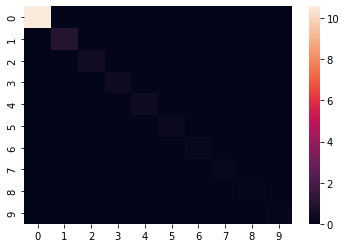

In [134]:
sns.heatmap(empirical_covariance(X_train_pca))

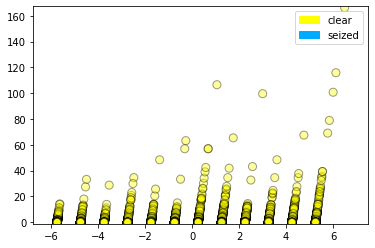

In [245]:
plot_labelled_scatter(X_train_pca, y_train_t, ['clear', 'seized'])

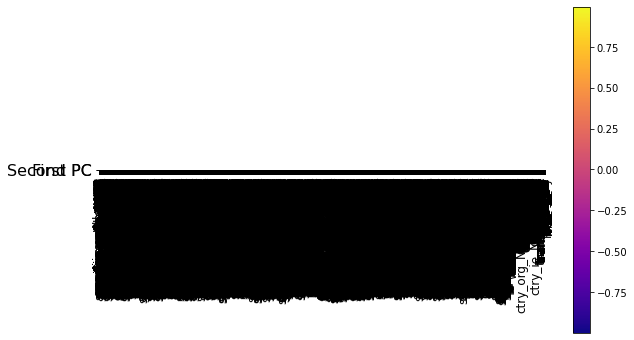

In [248]:
plot_pca(pca, transformed_features)

In [249]:
pca_sparse = SparsePCA(n_components=2, random_state=rng)
X_train_pca_sparse = pca_sparse.fit_transform(X_train_t.toarray())

In [254]:
joblib.dump(X_train_pca_sparse, f'{prefix}_X_train_pca_sparse.joblib')

['export_run1/export_X_train_pca_sparse.joblib']

<AxesSubplot:>

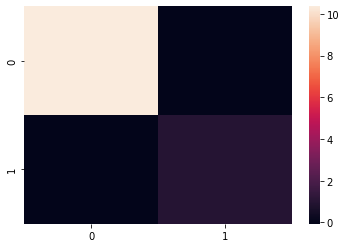

In [250]:
sns.heatmap(empirical_covariance(X_train_pca_sparse))

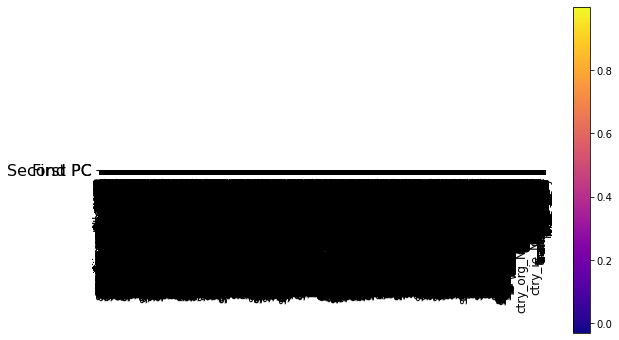

In [251]:
plot_pca(pca_sparse, transformed_features)